In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve, ConfusionMatrixDisplay,auc
import seaborn as sns
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

marketing= pd.read_csv('/content/sample_data/Bank Marketing.csv')

marketing = marketing.replace('unknown', pd.NA)  # feature engineering
marketing['y'] = marketing['y'].map({'yes': 1, 'no': 0})
features = marketing.drop('y',axis=1).columns.to_list()
categorical_features = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed']
marketing.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

*data vizualisation*

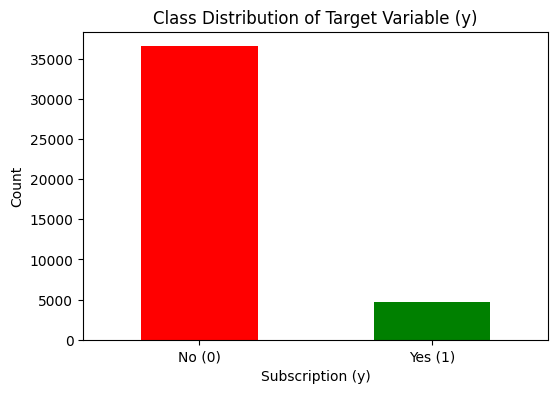

In [ ]:
class_counts = marketing['y'].value_counts()
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['red', 'green'])
plt.title("Class Distribution of Target Variable (y)")
plt.xlabel("Subscription (y)")
plt.ylabel("Count")
plt.xticks([0, 1], ['No (0)', 'Yes (1)'], rotation=0)
plt.show()

*exploratory data analysis (eda)*

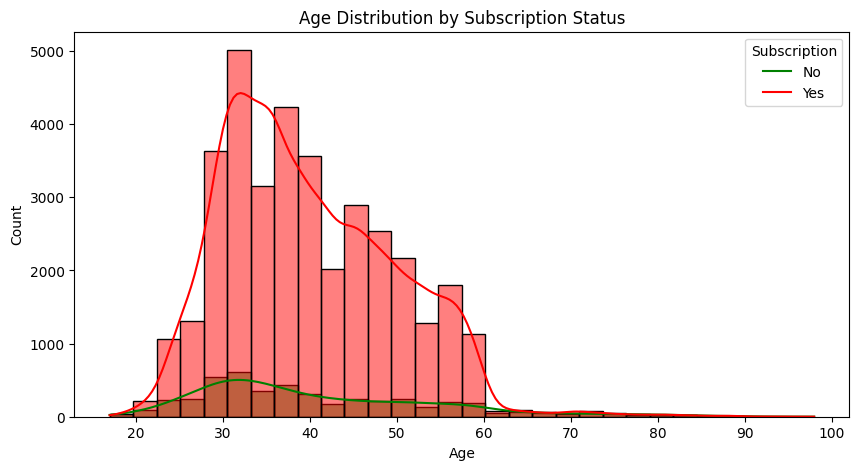

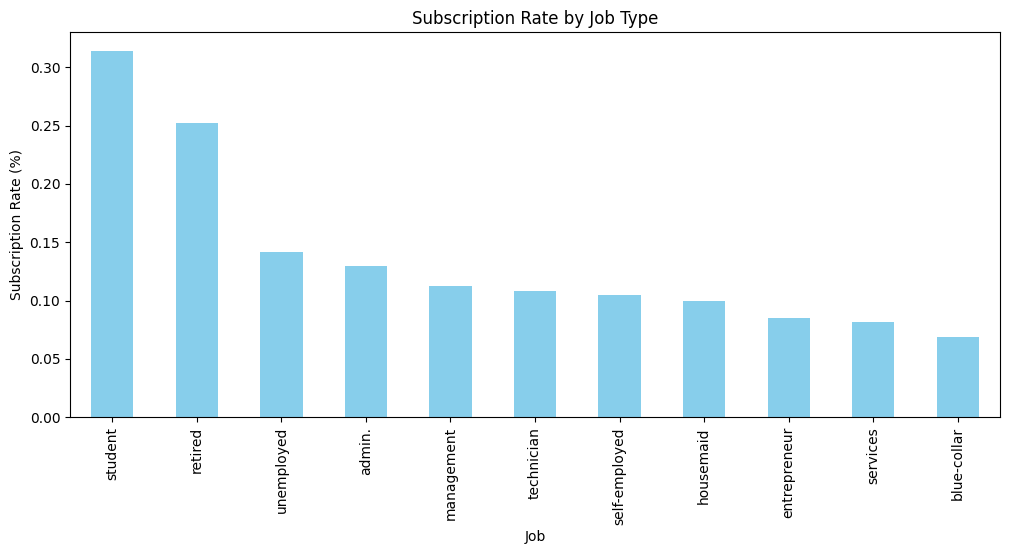

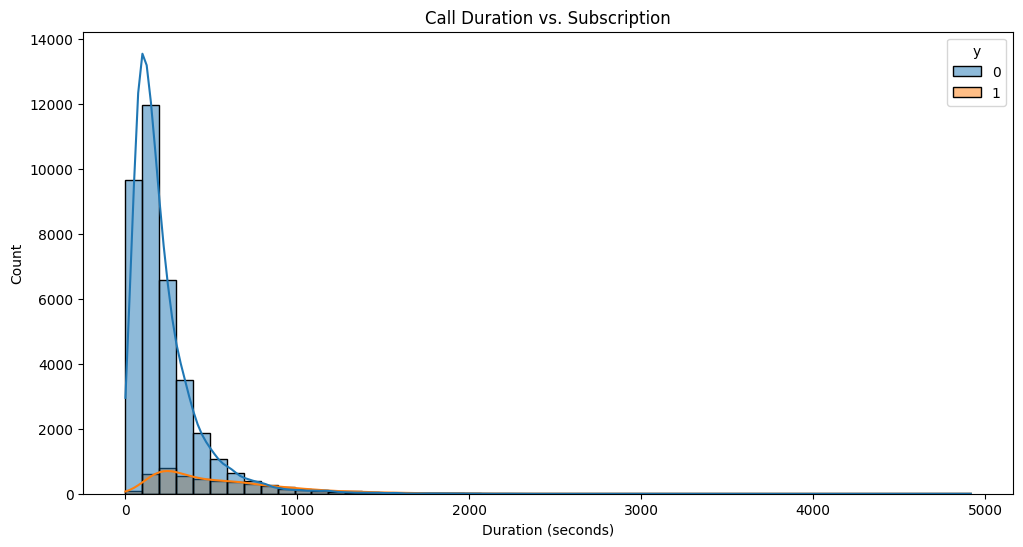

In [ ]:
#age vs subscription(y)
plt.figure(figsize=(10, 5))
sns.histplot(data=marketing, x='age', hue='y', kde=True, bins=30, palette=["red", "green"])
plt.title("Age Distribution by Subscription Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Subscription', labels=['No', 'Yes'])
plt.show()
#job vs y
job_subscription = marketing.groupby('job')['y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
job_subscription.plot(kind='bar', color='skyblue')
plt.title("Subscription Rate by Job Type")
plt.ylabel("Subscription Rate (%)")
plt.xlabel("Job")
plt.show()
#duration vs y
plt.figure(figsize=(12, 6))
sns.histplot(data=marketing, x='duration', hue='y', kde=True, bins=50)
plt.title("Call Duration vs. Subscription")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.show()

In [ ]:
marketing['is_duplicate'] = marketing.duplicated(keep=False)  # keep=False marks ALL duplicates

# Step 2: Filter to show ONLY duplicated rows (excluding originals)
dupe=marketing[marketing['is_duplicate']]
print(f"Total duplicate rows: {len(dupe)}")
# print(dupe.sort_values(by=marketing.columns.tolist()))
marketing=marketing.drop_duplicates()
marketing=marketing.drop(['is_duplicate'], axis = 1)
null_rows=marketing.isnull().any(axis=1).sum()
print(null_rows)
len(marketing)

Total duplicate rows: 24
10698


41176

In [ ]:
#we will impute instead of deleted null rows as the proportion is higher
for col in categorical_features:
  m=marketing[col].mode()[0]
  marketing[col]=marketing[col].fillna(m)
for col in numerical_features:
  marketing[col]=marketing[col].fillna(marketing[col].median())
marketing.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
enc = LabelEncoder()
for col in categorical_features:
  marketing[col] = marketing[col].astype(str)
  marketing[col] = enc.fit_transform(marketing[col])
marketing.dtypes
# marketing.head(15)

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [ ]:
for column in marketing.columns.to_list():
  col_var=np.var(marketing[column])
  print(column,':',round(col_var,2))

age : 108.59
job : 12.6
marital : 0.36
education : 4.33
default : 0.0
housing : 0.25
loan : 0.13
contact : 0.23
month : 5.38
day_of_week : 1.95
duration : 67237.62
campaign : 7.67
pdays : 34944.63
previous : 0.24
poutcome : 0.13
emp.var.rate : 2.47
cons.price.idx : 0.34
cons.conf.idx : 21.42
euribor3m : 3.01
nr.employed : 5220.13
y : 0.1


In [ ]:
scaler = StandardScaler()
marketing[features] = scaler.fit_transform(marketing[features])
# marketing.head(2)
for column in marketing.columns.to_list():
  col_var=np.var(marketing[column])
  print(column,':',round(col_var,2))

age : 1.0
job : 1.0
marital : 1.0
education : 1.0
default : 1.0
housing : 1.0
loan : 1.0
contact : 1.0
month : 1.0
day_of_week : 1.0
duration : 1.0
campaign : 1.0
pdays : 1.0
previous : 1.0
poutcome : 1.0
emp.var.rate : 1.0
cons.price.idx : 1.0
cons.conf.idx : 1.0
euribor3m : 1.0
nr.employed : 1.0
y : 0.1


In [ ]:
m_corr=marketing.corr()
m_corr

age       job   marital  education   default   housing  \
age             1.000000 -0.011917 -0.393417  -0.127798  0.001892 -0.001629   
job            -0.011917  1.000000  0.025389   0.131905  0.013701  0.007432   
marital        -0.393417  0.025389  1.000000   0.111373 -0.002388  0.011346   
education      -0.127798  0.131905  0.111373   1.000000  0.002577  0.016523   
default         0.001892  0.013701 -0.002388   0.002577  1.000000 -0.003680   
housing        -0.001629  0.007432  0.011346   0.016523 -0.003680  1.000000   
loan           -0.007189 -0.011784  0.006500   0.009295 -0.003610  0.036399   
contact         0.006917 -0.031850 -0.054636  -0.110493 -0.006476 -0.077851   
month          -0.025023 -0.032995 -0.008817  -0.084565 -0.004529 -0.016918   
day_of_week    -0.017614 -0.004136  0.002445  -0.016831  0.006079  0.003348   
duration       -0.000808 -0.004704  0.009018  -0.015812 -0.005102 -0.008367   
campaign        0.004622 -0.007674 -0.008692   0.000203 -0.003804 -0.011025   
pdays          -0.034381 -0.025701 -0.037415  -0.045772  0.001668 -0.010117   
previous        0.024379  0.022200  0.037723   0.037728  0.002765  0.021654   
poutcome        0.019750  0.006638  0.002456   0.016764 -0.006195 -0.012578   
emp.var.rate   -0.000242 -0.012913 -0.083641  -0.044552  0.004445 -0.059152   
cons.price.idx  0.001009 -0.022472 -0.056775  -0.086549 -0.003142 -0.077245   
cons.conf.idx   0.129075  0.044319 -0.033677   0.078148  0.004494 -0.032208   
euribor3m       0.010852 -0.012819 -0.091545  -0.036692  0.005274 -0.058239   
nr.employed    -0.017607 -0.022004 -0.086033  -0.040453  0.005942 -0.045619   
y               0.030381  0.025610  0.045896   0.057240 -0.003042  0.011145   

                    loan   contact     month  day_of_week  ...  campaign  \
age            -0.007189  0.006917 -0.025023    -0.017614  ...  0.004622   
job            -0.011784 -0.031850 -0.032995    -0.004136  ... -0.007674   
marital         0.006500 -0.054636 -0.008817     0.002445  ... -0.008692   
education       0.009295 -0.110493 -0.084565    -0.016831  ...  0.000203   
default        -0.003610 -0.006476 -0.004529     0.006079  ... -0.003804   
housing         0.036399 -0.077851 -0.016918     0.003348  ... -0.011025   
loan            1.000000 -0.013398 -0.007105    -0.009485  ...  0.005251   
contact        -0.013398  1.000000  0.276499    -0.009614  ...  0.077387   
month          -0.007105  0.276499  1.000000     0.027683  ... -0.062128   
day_of_week    -0.009485 -0.009614  0.027683     1.000000  ... -0.038254   
duration        0.000071 -0.026665  0.003637     0.021990  ... -0.071765   
campaign        0.005251  0.077387 -0.062128    -0.038254  ...  1.000000   
pdays          -0.000062  0.117999 -0.047885    -0.009531  ...  0.052606   
previous       -0.002187 -0.212903  0.103151    -0.004103  ... -0.079182   
poutcome       -0.000213  0.118773 -0.065010     0.018733  ...  0.032607   
emp.var.rate    0.001183  0.393730 -0.178724     0.033288  ...  0.150786   
cons.price.idx -0.005985  0.591596 -0.004183     0.005674  ...  0.127826   
cons.conf.idx  -0.013652  0.251575  0.009551     0.041405  ... -0.013657   
euribor3m      -0.000488  0.399892 -0.117216     0.039064  ...  0.135169   
nr.employed     0.004212  0.269285 -0.221370     0.028414  ...  0.144129   
y              -0.004478 -0.144774 -0.006051     0.015970  ... -0.066361   

                   pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
age            -0.034381  0.024379  0.019750     -0.000242        0.001009   
job            -0.025701  0.022200  0.006638     -0.012913       -0.022472   
marital        -0.037415  0.037723  0.002456     -0.083641       -0.056775   
education      -0.045772  0.037728  0.016764     -0.044552       -0.086549   
default         0.001668  0.002765 -0.006195      0.004445       -0.003142   
housing        -0.010117  0.021654 -0.012578     -0.059152       -0.077245   
loan           -0.000062 -0.002187 -0.000213      0.001183     

<Axes: >

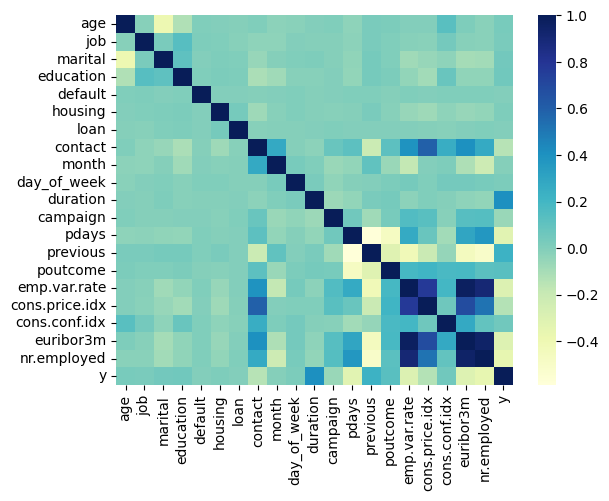

In [ ]:
sns.heatmap(m_corr, cmap = 'YlGnBu')

In [ ]:
marketing=marketing.drop(['nr.employed','euribor3m','emp.var.rate','duration'], axis=1)

In [ ]:
marketing['y'].value_counts()
#we need to balance y,n to prevent bias

y
0    36537
1     4639
Name: count, dtype: int64

In [ ]:
y_with_1 = marketing[marketing['y']==1]
y_with_0 = marketing[marketing['y']==0]
reduce_y_0 = y_with_0.sample(n=4639, replace=False)
marketing= pd.concat([reduce_y_0,y_with_1])
marketing= marketing.sample(frac=1)  # shuffling
marketing['y'].value_counts()

y
1    4639
0    4639
Name: count, dtype: int64

In [ ]:
X = marketing.drop(columns=['y'])
y=marketing['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify = y)
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (6494, 16)
Testing features shape: (2784, 16)
Training target shape: (6494,)
Testing target shape: (2784,)


*train ml model, calculating prediction, model evaluation*

In [ ]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
print("lr accuracy: {:.2f}".format(lr.score(X_test, y_test)))
nb=GaussianNB()
nb.fit(X_train, y_train)
print("nb accuracy: {:.2f}".format(nb.score(X_test, y_test)))

lr accuracy: 0.64
nb accuracy: 0.62


In [ ]:
# Create model
model = Sequential([
  Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  Dense(128, activation='relu'),
  Dense(10, activation="softmax")
])

# Compile model
model.compile(optimizer=Adam(0.001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs = 10, batch_size=128)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5170 - loss: 1.4296
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6684 - loss: 0.6007
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6857 - loss: 0.5840
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7002 - loss: 0.5730
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.5695
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7099 - loss: 0.5625
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7095 - loss: 0.5638
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7215 - loss: 0.5521
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7138 - loss: 0.5596
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7291 - loss: 0.5444


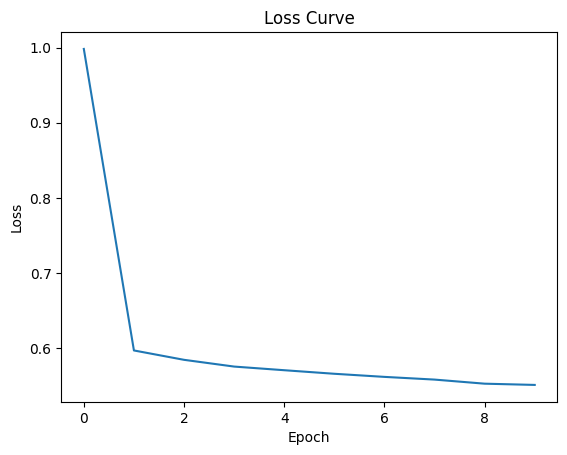

33/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7110 - loss: 0.5753   

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7061 - loss: 0.5785
Testing Accuracy: 70.65%


In [ ]:
plt.plot(history.history['loss'])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

#Print test error
print(f"Testing Accuracy: {round(model.evaluate(X_test, y_test)[1] * 100, 2)}%")

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
accuracy_nn=0.7065

Logistic Regression Accuracy: 64.37%
Naive Bayes Accuracy: 62.36%


In [ ]:
models = ["Logistic Regression", "Naive Bayes","Neural Network"]
accuracies = [accuracy_lr, accuracy_nb, accuracy_nn]
print(accuracies)
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange','green'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

[0.6436781609195402, 0.6235632183908046, 0.7065]


In [ ]:
target_names = ['No', 'Yes']
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg, target_names=target_names))

print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb, target_names=target_names))

Logistic Regression:
              precision    recall  f1-score   support

          No       0.63      0.70      0.66      1392
         Yes       0.66      0.59      0.62      1392

    accuracy                           0.64      2784
   macro avg       0.65      0.64      0.64      2784
weighted avg       0.65      0.64      0.64      2784

Naive Bayes:
              precision    recall  f1-score   support

          No       0.58      0.87      0.70      1392
         Yes       0.74      0.38      0.50      1392

    accuracy                           0.62      2784
   macro avg       0.66      0.62      0.60      2784
weighted avg       0.66      0.62      0.60      2784



In [ ]:
# Get probability for class 1 (positive class)
y_probs_log = logreg.predict_proba(X_test)[:, 1]
y_probs_nb = nb.predict_proba(X_test)[:, 1]

# For neural network, get softmax probabilities and take class 1
y_probs_nn = model.predict(X_test)
if y_probs_nn.shape[1] == 1:
    # sigmoid output
    y_probs_nn = y_probs_nn.ravel()
else:
    # softmax output, extract probability for class 1
    y_probs_nn = y_probs_nn[:, 1]

# Compute ROC curve and AUC for each model
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_probs_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_nn:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural network prediction shape: (2784, 10)
y_test shape: (2784,)


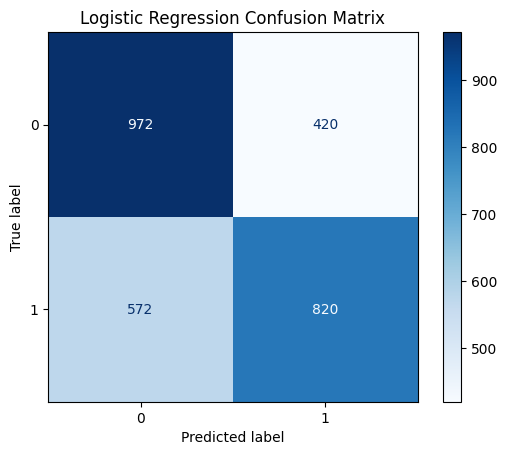

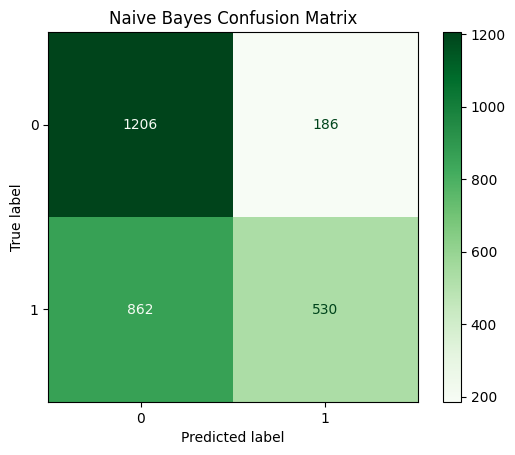

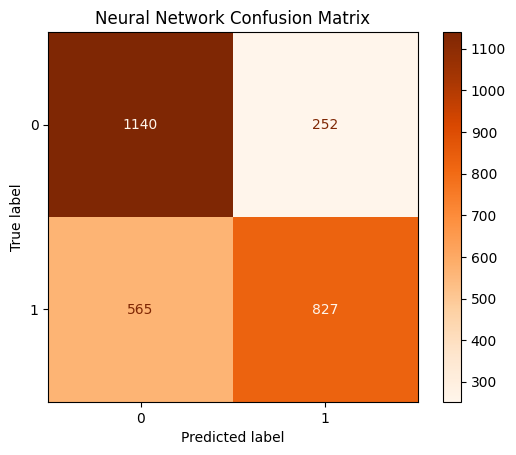


Accuracy Scores:
Logistic Regression: 0.6437
Naive Bayes:         0.6236
Neural Network:      0.7065


In [ ]:
# Logistic Regression predictions
y_pred_log = logreg.predict(X_test)

# Naive Bayes predictions
y_pred_nb = nb.predict(X_test)

# Neural Network raw predictions
y_probs_nn = model.predict(X_test)

# Print shape for debugging
print("Neural network prediction shape:", y_probs_nn.shape)
print("y_test shape:", y_test.shape)

# Convert neural net probabilities to class labels
if len(y_probs_nn.shape) == 2 and y_probs_nn.shape[1] > 1:
    # Softmax output (multi-class)
    y_pred_nn = np.argmax(y_probs_nn, axis=1)
else:
    # Sigmoid output (binary)
    y_pred_nn = (y_probs_nn > 0.5).astype(int).flatten()

# --- Confusion Matrices ---

# Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log).plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm_nb).plot(cmap="Greens")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
ConfusionMatrixDisplay(cm_nn).plot(cmap="Oranges")
plt.title("Neural Network Confusion Matrix")
plt.show()

# --- Accuracy Scores ---
print("\nAccuracy Scores:")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Naive Bayes:         {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Neural Network:      {accuracy_score(y_test, y_pred_nn):.4f}")